#Data Science Lifecycle
© 2024, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Important Notes:
1. LabelEncoder is used to tranform categorical data into numerical
2. train_test_split is used to split the data into training and testing
3. Logistic Regression is used to predict binary outcomes
4. accuracy_score is used to see the accuracy of this model

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [ ]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
data = pd.concat([train,test],ignore_index='True')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [ ]:
data.shape
#or
rows = data.shape[0]
columns = data.shape[1]
print(f" we have {rows} rows and {columns} columns")

 we have 614 rows and 13 columns


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Where did you find some missing values?     


**the missing values are in gender, married dependents,education,self_employed,loanAmount,loan_amount_term,credit_History**



##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:
for column in data.columns:
   x=data[column].unique()
   print(f"{column} attribute has {len(x)} unique values")



Loan_ID attribute has 614 unique values
Gender attribute has 3 unique values
Married attribute has 3 unique values
Dependents attribute has 5 unique values
Education attribute has 2 unique values
Self_Employed attribute has 3 unique values
ApplicantIncome attribute has 505 unique values
CoapplicantIncome attribute has 287 unique values
LoanAmount attribute has 204 unique values
Loan_Amount_Term attribute has 11 unique values
Credit_History attribute has 3 unique values
Property_Area attribute has 3 unique values
Loan_Status attribute has 2 unique values


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [ ]:
unique_variables = data['Credit_History'].unique()
print(unique_variables)

[ 1.  0. nan]


Do the same with the variable Loan_Amount_Term

In [ ]:
LoanAmountTerm = data['Loan_Amount_Term'].unique()
print(LoanAmountTerm)

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
data.describe(include='O')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Interpret the results you obtained for the variable Gender

**[Share your Zaka here]**
**In the variable gender we have 601 filled rows ,and the most gender being found is male with frequency = 489**

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:

x= data['Property_Area'].value_counts()
print("the frequency of the unique values in")
print(x)

the frequency of the unique values in
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [ ]:

x= data['Dependents'].value_counts()
print("the frequency of the unique values in")
print(x)

the frequency of the unique values in
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [ ]:
removeNA_df =data.dropna()
removeNA_df.head(30)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [ ]:
removeNA_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Plot the distribution and the boxplot for the variable 'LoanAmount'

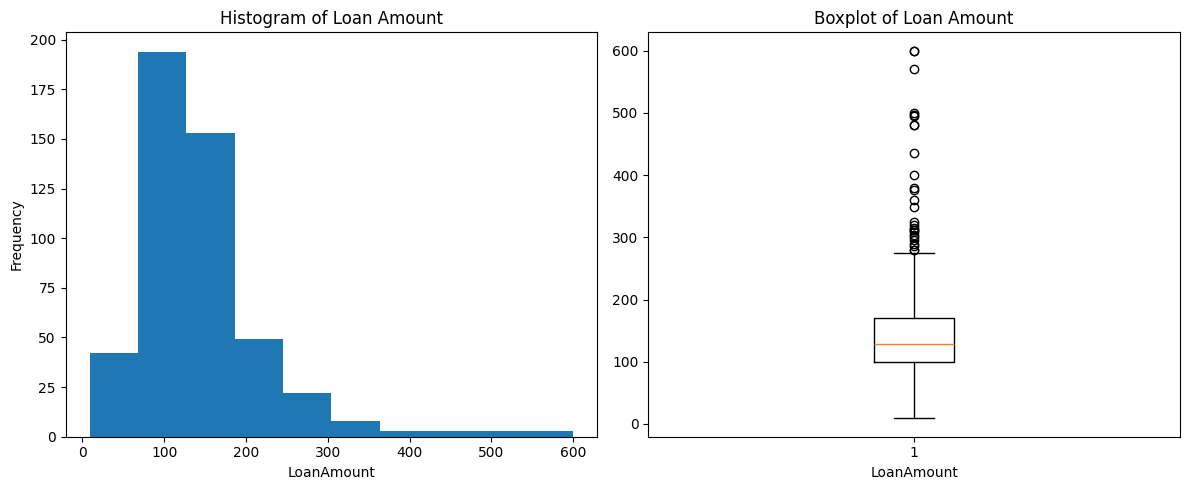

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(removeNA_df['LoanAmount'])
axes[0].set_xlabel('LoanAmount')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Loan Amount')


axes[1].boxplot(removeNA_df['LoanAmount'])
axes[1].set_xlabel('LoanAmount')
axes[1].set_title('Boxplot of Loan Amount')

plt.tight_layout()
plt.show()


* Is there any outlier?
* Is the data skewed?

Yes the box plot shows outliers
and the data is positively skewed **bold text**

Do the same for the variable 'ApplicantIncome'

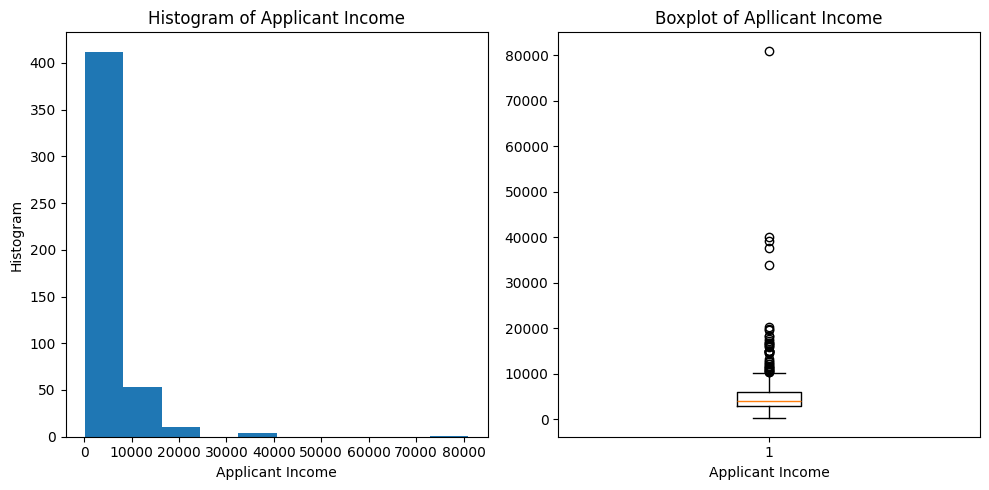

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
axes[0].hist(removeNA_df['ApplicantIncome'])
axes[0].set_title('Histogram of Applicant Income')
axes[0].set_xlabel('Applicant Income')
axes[0].set_ylabel('Histogram')

axes[1].boxplot(removeNA_df['ApplicantIncome'])
axes[1].set_title('Boxplot of Apllicant Income')
axes[1].set_xlabel('Applicant Income')

plt.tight_layout()
plt.show()

* Is there any outlier?
* Is the data skewed?

**bold text**
the applicant income variable shows that there are outliers and the data is being skewed to the left(pos)

Do the same for 'CoapplicantIncome'

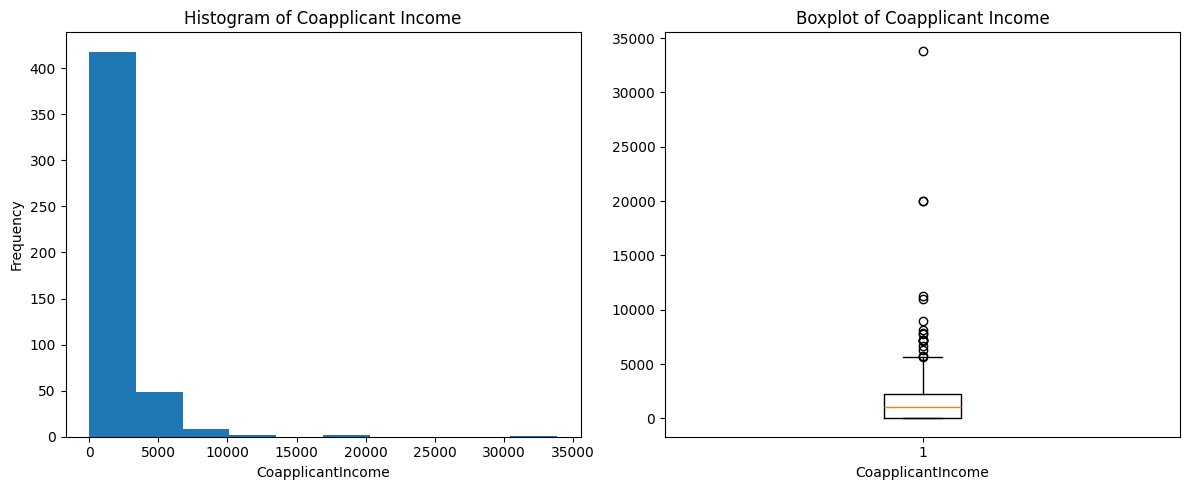

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(removeNA_df['CoapplicantIncome'])
axes[0].set_xlabel('CoapplicantIncome')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Coapplicant Income')

axes[1].boxplot(removeNA_df['CoapplicantIncome'])
axes[1].set_xlabel('CoapplicantIncome')
axes[1].set_title('Boxplot of Coapplicant Income')
plt.tight_layout()
plt.show()


**bold text**  also there are outliers and the histogram shows that the data is skewed to the left

Do the same for 'Loan_Amount_Term'

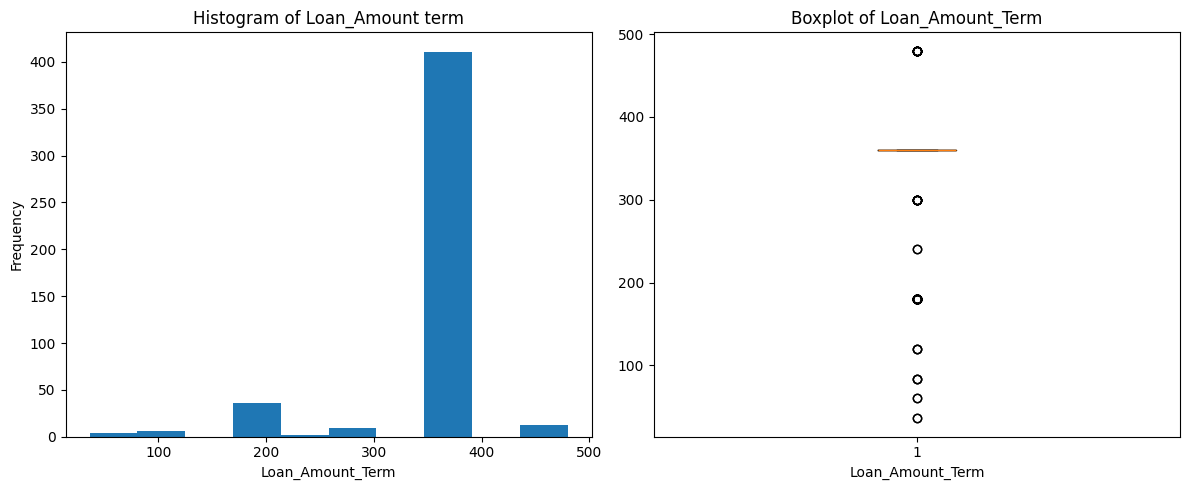

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(removeNA_df['Loan_Amount_Term'])
axes[0].set_xlabel('Loan_Amount_Term')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Loan_Amount term')


axes[1].boxplot(removeNA_df['Loan_Amount_Term'])
axes[1].set_xlabel('Loan_Amount_Term')
axes[1].set_title('Boxplot of Loan_Amount_Term')


plt.tight_layout()
plt.show()


What do you think about outliers in this case?

**bold text**
Most of the clients who took a loan divided their payments around 350 months, and the remaining clients divided their payments within a range of 300 months or even less. However, the person who took a loan for around 500 months raises the question of whether this is normal for this bank. Further investigation is needed to check the allowed range for dividing the payments over a number of months, to determine whether these outliers are within acceptable limits or if they require concern

Plot the value_counts for 'Loan_Amount_term'

Loan_Amount_Term
36.0       2
60.0       2
84.0       3
120.0      3
180.0     36
240.0      2
300.0      9
360.0    411
480.0     12
Name: count, dtype: int64


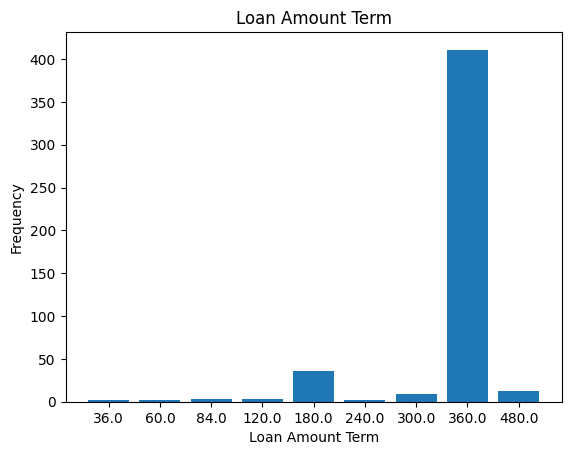

In [ ]:
value_count = removeNA_df['Loan_Amount_Term'].value_counts().sort_index()
print(value_count)
plt.bar(value_count.index.astype(str),value_count.values)
plt.title('Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.show()

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

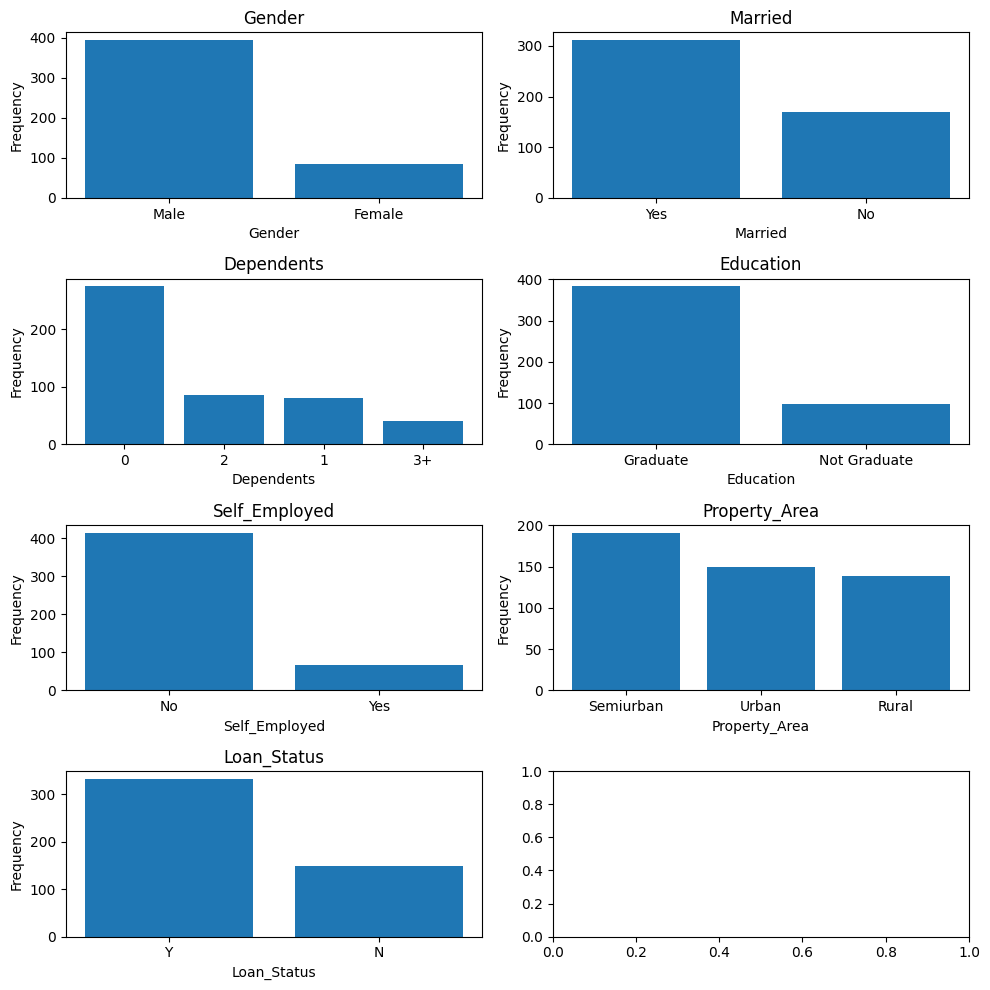

In [ ]:

categorical_columns = removeNA_df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

# Create subplots (nrows=4, ncols=2 to fit 7 plots in a grid)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical variable and plot its value counts
for i, column in enumerate(categorical_columns.columns):
    value_count = categorical_columns[column].value_counts()
    axes[i].bar(value_count.index.astype(str), value_count.values)
    axes[i].set_title(f"{column}")  # Set title as the column name
    axes[i].set_xlabel(column)  # Set xlabel as the column name
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

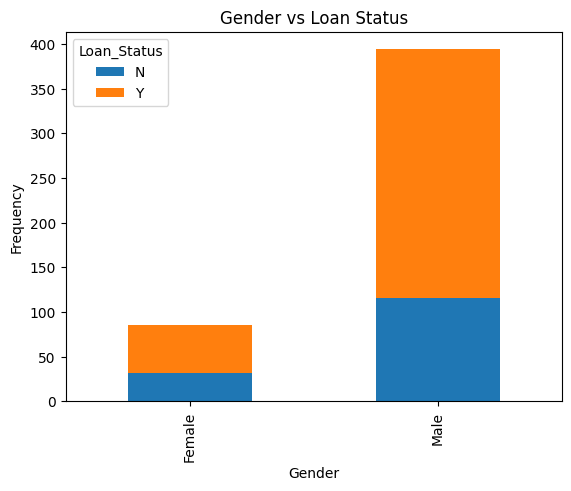

In [ ]:
cross_result = pd.crosstab(removeNA_df['Gender'],removeNA_df['Loan_Status'])
cross_result

cross_result.plot(kind='bar',stacked=True)
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [ ]:
cross_result = pd.crosstab(removeNA_df['Gender'],removeNA_df['Loan_Status'],margins=True)
cross_result


Loan_Status,N,Y,All
Gender,,,
Female,32,54,86
Male,116,278,394
All,148,332,480


In [ ]:
import scipy.stats as stats
stats.chi2_contingency(cross_result)
#pvalue >0.05 , so we accept H0 meaning that there is no rltp between gender and loan acceptance

Chi2ContingencyResult(statistic=1.9971861013657772, pvalue=0.7362764699005385, dof=4, expected_freq=array([[ 26.51666667,  59.48333333,  86.        ],
       [121.48333333, 272.51666667, 394.        ],
       [148.        , 332.        , 480.        ]]))

Does the Gender affect the acceptance of the Loan?

**bold text**
based on the bar chart , there is no clear evidence that there is relationship between gender and loan acceptance

Do the same with Credit_history and Loan_Status

In [ ]:
credit_history_loan_status = pd.crosstab(removeNA_df['Credit_History'],removeNA_df['Loan_Status'])
credit_history_loan_status


Loan_Status,N,Y
Credit_History,,
0.0,63,7
1.0,85,325


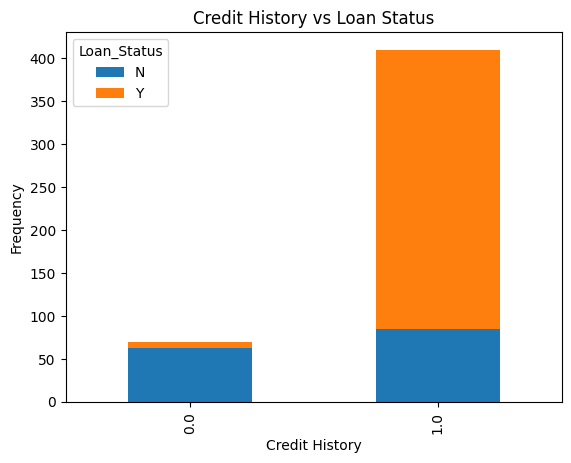

In [ ]:
credit_history_loan_status.plot(kind='bar',stacked=True)
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Frequency')
plt.show()

Does the Credit History affect the acceptance of the Loan?

**[Share your Zaka here]**
yes it is clear that the person who previously took a loan has high chances to take a loan one more time. In contrast, the majority of people who didnt take a loan in the past, werent able to take a loan.

Do the same with Dependents and Loan_Status

In [ ]:
Dependents_Loan_Status = pd.crosstab(removeNA_df['Dependents'],removeNA_df['Loan_Status'],margins=True)
Dependents_Loan_Status

Loan_Status,N,Y,All
Dependents,,,
0,87,187,274
1,28,52,80
2,20,65,85
3+,13,28,41
All,148,332,480


In [ ]:
stats.chi2_contingency(credit_history_loan_status)

Chi2ContingencyResult(statistic=131.29328312402075, pvalue=2.135981766869101e-30, dof=1, expected_freq=array([[ 21.58333333,  48.41666667],
       [126.41666667, 283.58333333]]))

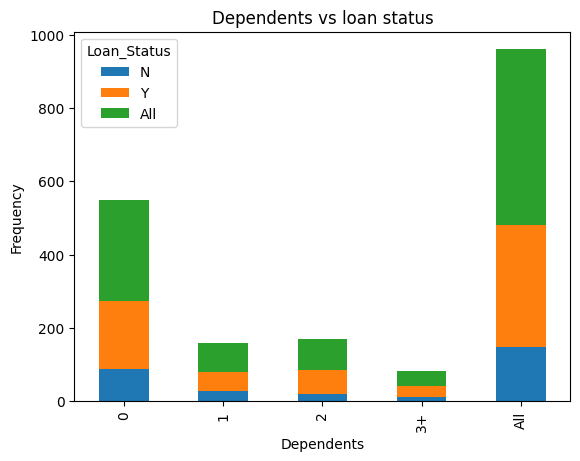

In [ ]:
Dependents_Loan_Status.plot(kind='bar',stacked=True)
plt.title('Dependents vs loan status')
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.show()

Does the number of dependents affect the acceptance of the Loan?


**bold text**
there is no clear relationship if the number of dependence will decrease the probability of acceptance or not since the % of acceptance rate for customers who have 2 dependents = 75% , this % decreased to 65% when the number of dependents increased.
 note: the % of acceptance rate when dep =0 is equal to 68%.
this % decreased when customers have 1 or 3+ dependence , and it increased to 75% when the customer has 2 dep.
further investigation is needed to make sure if the number of dependence play a role or  not

In [ ]:
stats.chi2_contingency(Dependents_Loan_Status)

Chi2ContingencyResult(statistic=2.9005746522947455, pvalue=0.9404411113914783, dof=8, expected_freq=array([[ 84.48333333, 189.51666667, 274.        ],
       [ 24.66666667,  55.33333333,  80.        ],
       [ 26.20833333,  58.79166667,  85.        ],
       [ 12.64166667,  28.35833333,  41.        ],
       [148.        , 332.        , 480.        ]]))

Do the same between Education and Loan_Status

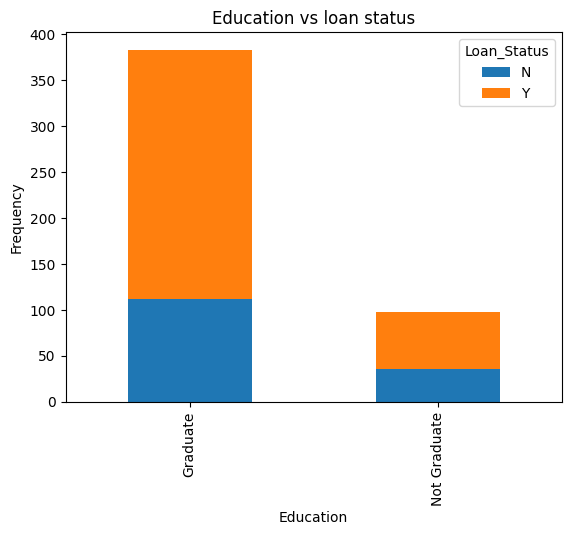

In [ ]:
Education_Loan_Status = pd.crosstab(removeNA_df['Education'],removeNA_df['Loan_Status'])
Education_Loan_Status.plot(kind='bar',stacked = True)
plt.title('Education vs loan status')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [ ]:
stats.chi2_contingency(Education_Loan_Status)

Chi2ContingencyResult(statistic=1.8942441427817767, pvalue=0.16872400009733118, dof=1, expected_freq=array([[118.09166667, 264.90833333],
       [ 29.90833333,  67.09166667]]))

In [ ]:
Education_Loan_Status

Loan_Status,N,Y
Education,,
Graduate,112,271
Not Graduate,36,61


Does the level of education affect the acceptance of the Loan?

** **bold text**
there is a slight effect of the level of education on the acceptance of the loan , since the % rate of acceptance for graduates is = 70.5% which is greater than the percentage rate acceptance of non_graduates (62.8%)

Do the same between Married and Loan_Status

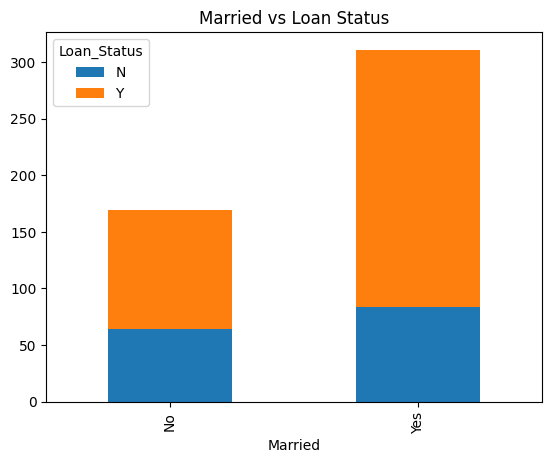

In [ ]:
Married_Loan_Status = pd.crosstab(removeNA_df['Married'],removeNA_df['Loan_Status'])
Married_Loan_Status.plot(kind='bar',stacked = True)
plt.title('Married vs Loan Status')
plt.xlabel('Married')
plt.show()

In [ ]:
stats.chi2_contingency(Married_Loan_Status)

Chi2ContingencyResult(statistic=5.557140235492528, pvalue=0.018405456386355375, dof=1, expected_freq=array([[ 52.10833333, 116.89166667],
       [ 95.89166667, 215.10833333]]))

In [ ]:
Married_Loan_Status

Loan_Status,N,Y
Married,,
No,64,105
Yes,84,227


Does the marriage affect the acceptance of the Loan?

**bold text**
yes marriage affects the acceptance of the loan since married people have higher % rate of acceptance compared to not married people.


Do the same between Property_Area and Loan_Status

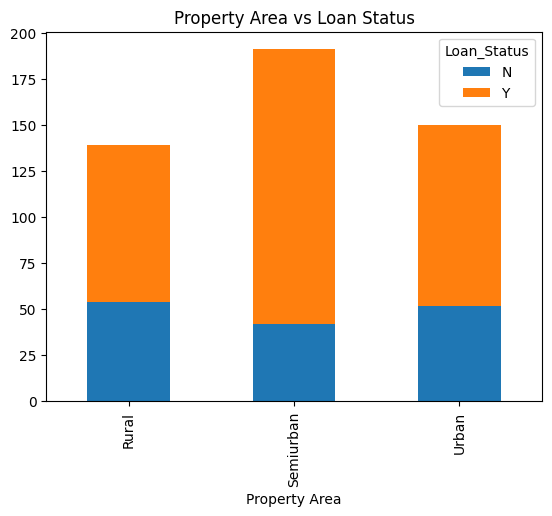

In [ ]:
Property_Area_Loan_Status = pd.crosstab(removeNA_df['Property_Area'],removeNA_df['Loan_Status'])
Property_Area_Loan_Status.plot(kind='bar',stacked=True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.show()


In [ ]:
stats.chi2_contingency(Property_Area_Loan_Status)

Chi2ContingencyResult(statistic=12.2259455519901, pvalue=0.0022139594148752133, dof=2, expected_freq=array([[ 42.85833333,  96.14166667],
       [ 58.89166667, 132.10833333],
       [ 46.25      , 103.75      ]]))

Does the Property Area affect the acceptance of the Loan?

** **bold text**[Share your Zaka here]**
yes, the acceptance of the loan can depend on the type of country the customer lives in. it is found that people who live in semiurban countries are most likely to take the loan more than urban and rural countries

Do the same between Self_Employed and Loan_Status

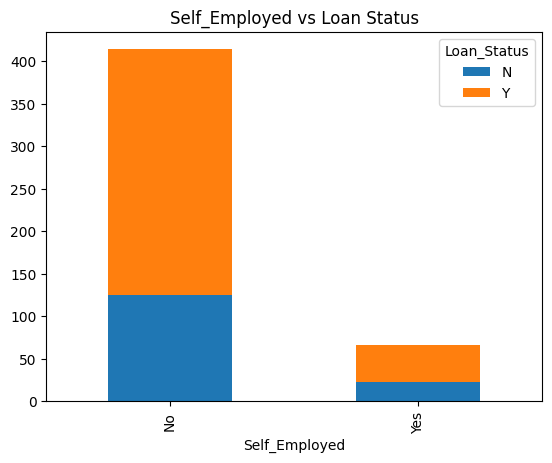

In [ ]:
Self_Employed_Loan_Status = pd.crosstab(removeNA_df['Self_Employed'],removeNA_df['Loan_Status'])
Self_Employed_Loan_Status.plot(kind='bar',stacked = True)
plt.title('Self_Employed vs Loan Status')
plt.xlabel('Self_Employed')
plt.show()

In [ ]:
Self_Employed_Loan_Status

Loan_Status,N,Y
Self_Employed,,
No,125,289
Yes,23,43


Does the Self Employed Property affect the acceptance of the Loan?

In [ ]:
stats.chi2_contingency(Self_Employed_Loan_Status)

Chi2ContingencyResult(statistic=0.38076459239371707, pvalue=0.5371943232746994, dof=1, expected_freq=array([[127.65, 286.35],
       [ 20.35,  45.65]]))

 **bold text**
 there is no significant change in the % rate of acceptance between self_employed and non_self_employed. So acceptance doesnt depend on self_employment

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

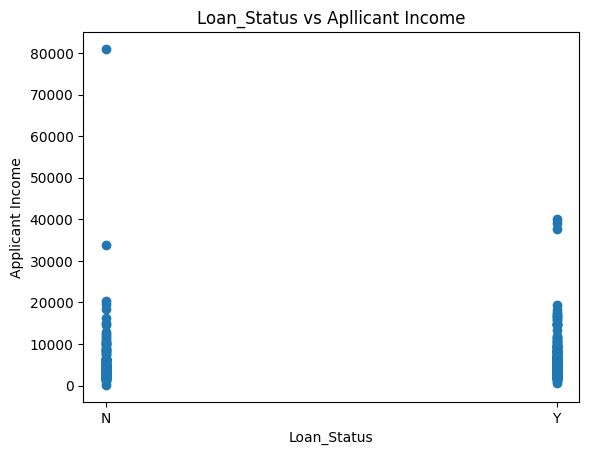

In [ ]:
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['ApplicantIncome'])
plt.title('Loan_Status vs Apllicant Income')
plt.xlabel('Loan_Status')
plt.ylabel('Applicant Income')
plt.show()

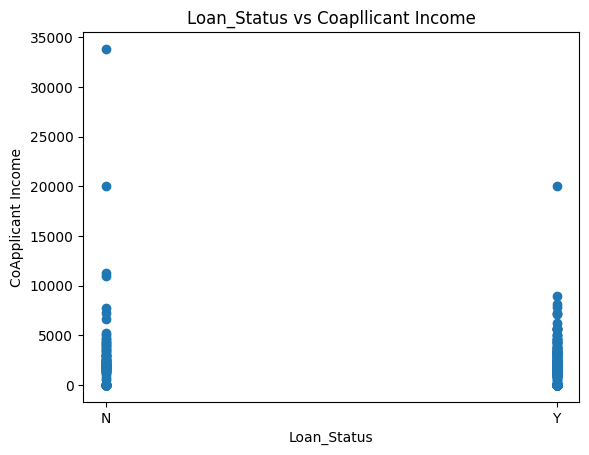

In [ ]:
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['CoapplicantIncome'])
plt.title('Loan_Status vs Coapllicant Income')
plt.xlabel('Loan_Status')
plt.ylabel('CoApplicant Income')
plt.show()

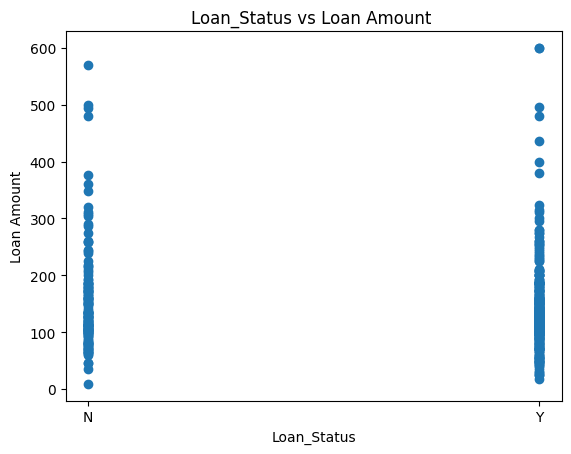

In [ ]:
plt.scatter(x=removeNA_df['Loan_Status'],y=removeNA_df['LoanAmount'])
plt.title('Loan_Status vs Loan Amount ')
plt.xlabel('Loan_Status')
plt.ylabel('Loan Amount')
plt.show()

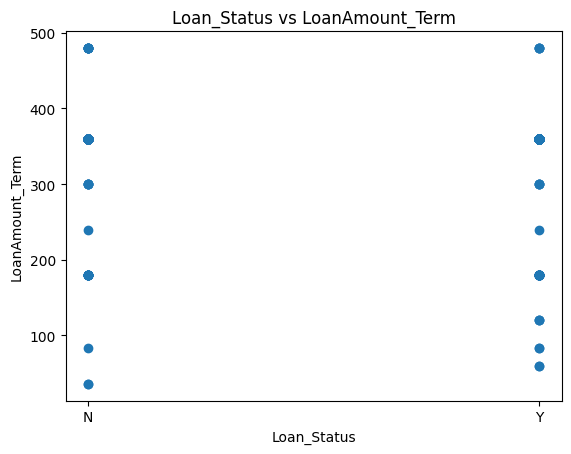

In [ ]:
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['Loan_Amount_Term'])
plt.title('Loan_Status vs LoanAmount_Term')
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount_Term')
plt.show()

Do you think these scatter plots gave you valuable information about the Loan_Status?

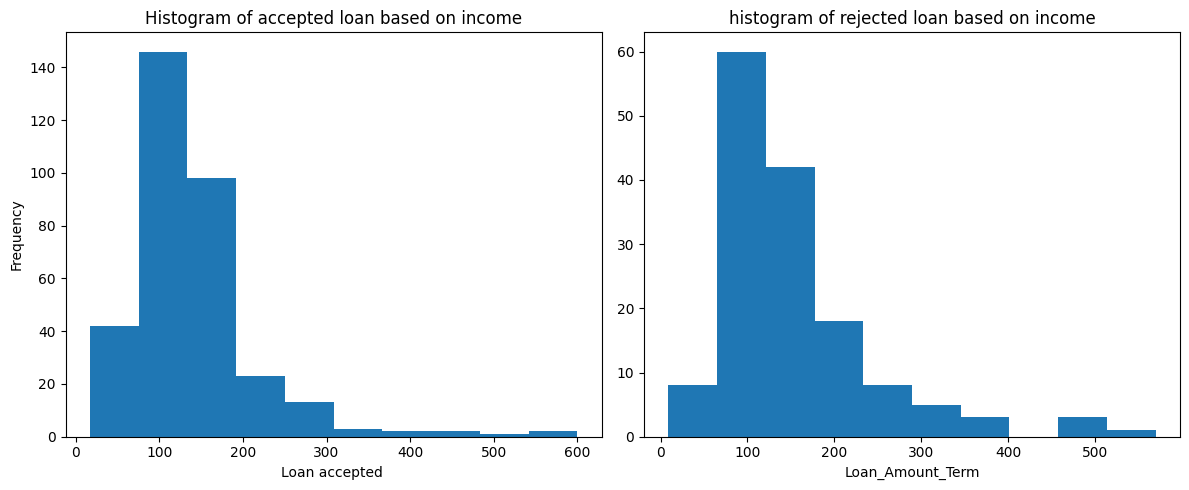

In [ ]:
loan_acc = removeNA_df[removeNA_df['Loan_Status']=='Y']['LoanAmount']
Loan_rej = removeNA_df[removeNA_df['Loan_Status']=='N']['LoanAmount']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(loan_acc)
axes[0].set_xlabel('Loan accepted ')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of accepted loan based on income')


axes[1].hist(Loan_rej)
axes[1].set_xlabel('Loan_Amount_Term')
axes[1].set_title('histogram of rejected loan based on income')


plt.tight_layout()
plt.show()


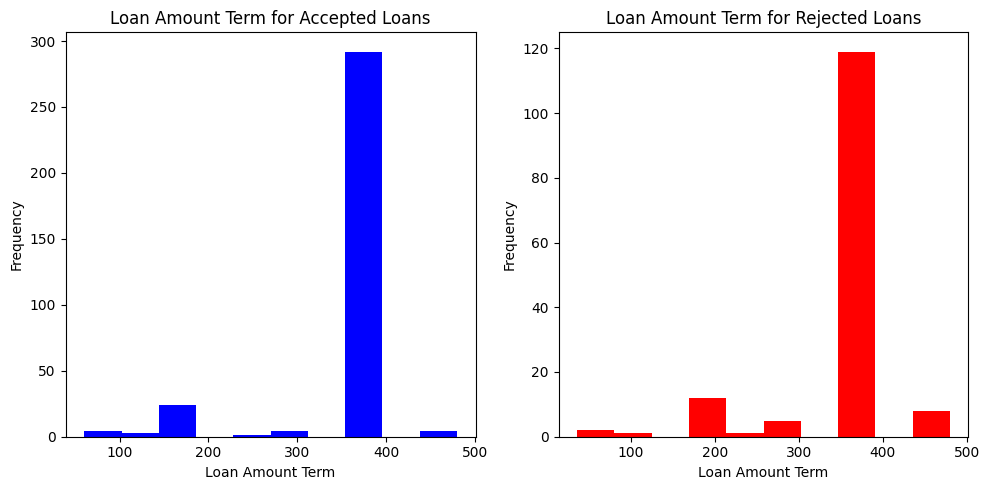

In [ ]:

loan_amount_acc = removeNA_df[removeNA_df['Loan_Status'] == 'Y']['Loan_Amount_Term']
loan_amount_rej = removeNA_df[removeNA_df['Loan_Status'] == 'N']['Loan_Amount_Term']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(loan_amount_acc, bins=10, color='blue')
axes[0].set_title('Loan Amount Term for Accepted Loans')
axes[0].set_xlabel('Loan Amount Term')
axes[0].set_ylabel('Frequency')

axes[1].hist(loan_amount_rej, bins=10, color='red')
axes[1].set_title('Loan Amount Term for Rejected Loans')
axes[1].set_xlabel('Loan Amount Term')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**bold text**
the loan_acceptance doesnt depend on the loan_amount or applicant income

**[Share your Zaka here]**
**bold text**   
the scatter plot indicated that the loan acceptance doesnt really depend on the applicant income or the amount of loan.

Group your dataframe by Loan_Status on the median Value

In [ ]:

numerical_variables = removeNA_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status','Property_Area']]

median_values = numerical_variables.groupby('Loan_Status').median()

median_values.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3871.0,0.0,128.0,360.0,1.0
Y,3858.5,1211.5,128.0,360.0,1.0


What did you deduce?

** **bold text**
after  grouping my dataset by loan acceptance on median value , i found out that the co_applicant income can play a big role in the acceptance of the loan , since there is a big difference between the co-applicant that has no money (the application is rejected) vs the co-applicant that has as a median value around 1211.5
while the applicant income wasnt a significant variable since in either cases the income was somehow similar

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [ ]:
data = data.drop(columns = ['LoanAmount','Loan_Amount_Term','Gender','Loan_ID','Dependents','ApplicantIncome','Self_Employed'])
data.head()

,Married,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,No,Graduate,0.0,1.0,Urban,Y
1,Yes,Graduate,1508.0,1.0,Rural,N
2,Yes,Graduate,0.0,1.0,Urban,Y
3,Yes,Not Graduate,2358.0,1.0,Urban,Y
4,No,Graduate,0.0,1.0,Urban,Y


## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [ ]:
data['Dependents'] = data['Dependents'].replace('3+', 3)
data.head()


KeyError: 'Dependents'

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:
data['Dependents'] = data['Dependents'].apply(lambda x: 'No' if x == 0 else 'Yes')


KeyError: 'Dependents'

In [ ]:
data.head()

,Married,Dependents,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,No,Yes,Graduate,0.0,1.0,Urban,Y
1,Yes,Yes,Graduate,1508.0,1.0,Rural,N
2,Yes,Yes,Graduate,0.0,1.0,Urban,Y
3,Yes,Yes,Not Graduate,2358.0,1.0,Urban,Y
4,No,Yes,Graduate,0.0,1.0,Urban,Y


## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:
data = data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x.fillna(x.mean()))


In [ ]:
data.head(30)

,Married,Dependents,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,No,Yes,Graduate,0.0,1.000000,Urban,Y
1,Yes,Yes,Graduate,1508.0,1.000000,Rural,N
2,Yes,Yes,Graduate,0.0,1.000000,Urban,Y
3,Yes,Yes,Not Graduate,2358.0,1.000000,Urban,Y
4,No,Yes,Graduate,0.0,1.000000,Urban,Y
5,Yes,Yes,Graduate,4196.0,1.000000,Urban,Y
6,Yes,Yes,Not Graduate,1516.0,1.000000,Urban,Y
7,Yes,Yes,Graduate,2504.0,0.000000,Semiurban,N
8,Yes,Yes,Graduate,1526.0,1.000000,Urban,Y
9,Yes,Yes,Graduate,10968.0,1.000000,Semiurban,N


## Check if any null value exist

In [ ]:
data.isnull().sum()

,0
Married,0
Education,0
Self_Employed,0
CoapplicantIncome,0
Credit_History,0
Loan_Status,0


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
data['Education']= data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})
data['Property_Area'] = data['Property_Area'].replace({'Urban':0,'Semiurban':1,'Rural':2})


In [ ]:
data.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0,1,0,5849,0.0,1.0,0,1
1,1,1,0,4583,1508.0,1.0,2,0
2,1,1,1,3000,0.0,1.0,0,1
3,1,0,0,2583,2358.0,1.0,0,1
4,0,1,0,6000,0.0,1.0,0,1


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [ ]:
data_max = data.max()
data_max


,0
Married,1.0
Education,1.0
CoapplicantIncome,41667.0
Credit_History,1.0
Property_Area,2.0
Loan_Status,1.0


In [ ]:
data = data.divide(data_max)
data.describe()

,Married,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.781759,0.038910,0.842199,0.481270,0.687296
std,0.476373,0.413389,0.070229,0.349681,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.028524,1.000000,0.500000,1.000000
75%,1.000000,1.000000,0.055134,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:
# store all columns except the last one as inputs in X
X = data.iloc[:, 0:-1].values

# store the last column as the output (label) in y
y = data.iloc[:, -1].values

# split dataset into a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print the shapes of the split data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(429, 5) (429,)
(185, 5) (185,)


##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:
# define our regression model
model = LogisticRegression()

# train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [ ]:
print(f"model score is {model.score(x_test,y_test)}")

model score is 0.7837837837837838


#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

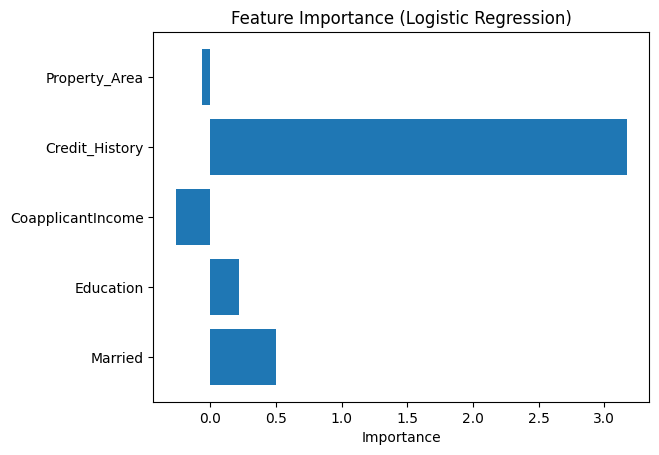

In [ ]:
feature_importance = model.coef_[0]

# Assuming you have column names

columns_names = data.columns[0:-1].values




# Plot the feature importance
plt.barh(columns_names, feature_importance)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance')
plt.show()


What's the most important feature?

** **bold text**[Share your Zaka here]**
the most important feature is the credit_history , and the second important feature is if the applicant is married or not.
so, every applicant who already took a loan in the past has high chances to take another loan again.
Marriage also could be another factor in the acceptance of the loan.
Education might play a minor role in this situation if he is graduated or not.
The table that i did concerning grouping by loan_status on median wasnt really beneficial since i thought at first that credit_History isnt important feature.